## NOTE

The questions to the lab questions are found in the notebook sections headlined as : __Question: ''__

# IMPORTS


In [1]:
from PIL import Image
import cv2, matplotlib.pyplot as plt
from torchsummary import summary

# Building a Deep Neural Network
### Topics



*   Representing an image
*   Why leverage neural networks for image analysis?
*   Preparing data for image classification
*   Training a neural network
*   Scaling a dataset to improve model accuracy
*   Understanding the impact of varying the batch size
*   Understanding the impact of varying the loss optimizer
*   Understanding the impact of varying the learning rate
*   Understanding the impact of learning rate annealing
*   Building a deeper neural network
*   Understanding the impact of batch normalization
*   The concept of overfitting



 ### Representing Images

*   A pixel is the smallest constituting element of an image. In a grayscale image, each pixel is a scalar (single) value between 0 and 255 – 0 is black, 255 is white, and anything in between is gray (the smaller the pixel value, the darker the pixel is).
*   On the other hand, the pixels in color images are three-dimensional vectors that correspond to the scalar values that can be found in its red, green, and blue channels.
*   An image has height x width x c pixels, where height is the number of rows of pixels, width is the number of columns of pixels, and c is the number of channels.
*    c is 3 for color images (one channel each for the red, green, and blue intensities of the image) and 1 for grayscale images

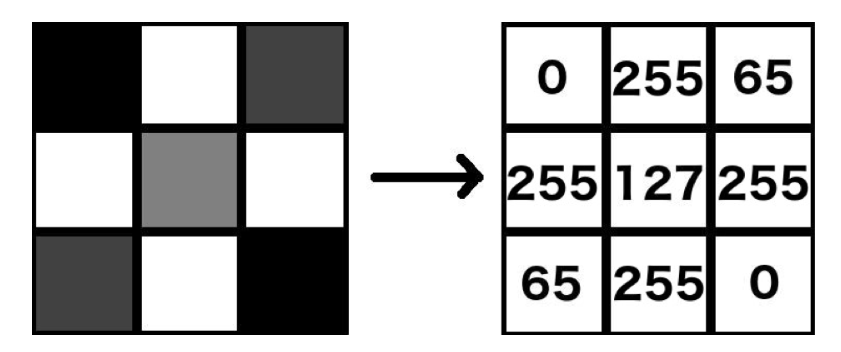



#### Convert Images to structured arrays and sclars: Grayscale

In [2]:
!wget https://d2u1z1lopyfwlx.cloudfront.net/thumbnails/cee3b479-769d-533c-8e78-9afbbb6ab9df/0a70a1f0-0f34-568f-984b-93925b2b7e48.jpg

--2025-02-07 04:43:11--  https://d2u1z1lopyfwlx.cloudfront.net/thumbnails/cee3b479-769d-533c-8e78-9afbbb6ab9df/0a70a1f0-0f34-568f-984b-93925b2b7e48.jpg
Resolving d2u1z1lopyfwlx.cloudfront.net (d2u1z1lopyfwlx.cloudfront.net)... 65.8.248.43, 65.8.248.129, 65.8.248.7, ...
Connecting to d2u1z1lopyfwlx.cloudfront.net (d2u1z1lopyfwlx.cloudfront.net)|65.8.248.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9654 (9.4K) [image/jpeg]
Saving to: ‘0a70a1f0-0f34-568f-984b-93925b2b7e48.jpg’

0a70a1f0-0f34-568f- 100%[===================>]   9.43K  --.-KB/s    in 0s      

2025-02-07 04:43:11 (139 MB/s) - ‘0a70a1f0-0f34-568f-984b-93925b2b7e48.jpg’ saved [9654/9654]



## QUESTION: IMAGE REPRESENTATION

I have loaded an image from the kaggle image dataset to test out image representation. From the image output below you can see that my image has a shape of __(480, 640, 3)__ which means 480 pixel rows on the Y axis, 640 pixel columns along the x axis, and 3 channels which means it is an RGB image.

I have plotted the images loaded using PIL library and openCV, the key difference between the two is that OpenCV's imread load images in __BGR__ format as evident in the plotted sup-graphs.

To compare color image and grayscale image, I am going to use openCV's `cvtcolor` method and plot it also as a subplot. As you can see from the shape below, it is an image of __(480, 640)__, here you don't include the channel since it is one channel

In the final print statement of this segment, I have printed out the first 10 rows and columns of the image just to show how pixels are arranged in the array.

shape of the image before converting to grayscale: (480, 640, 3)
Shape of the image after converting it to grayscale: (480, 640)


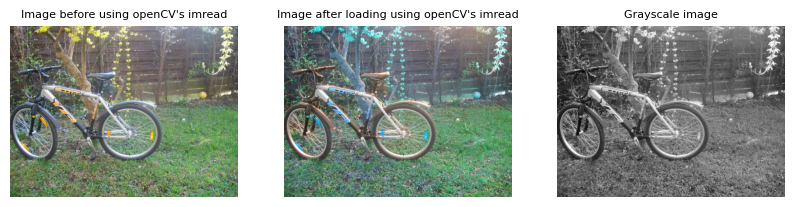

The first 10 rows and columns of the image is:
 [[ 63  63  70  77  66  68  72  67  66  71]
 [ 59  62  66  73  62  61  73  62  60  65]
 [ 59  58  64  76  67  64  75  67  62  61]
 [ 60  61  61  75  68  62  75  67  64  67]
 [ 73  64  66  71  68  63  67  70  70  79]
 [ 77  77  82  78  74  63  70  75  87  85]
 [ 73  85 103  92  83  82  82  81  74  70]
 [ 64  67  79  90  92  97  86  76  71  76]
 [ 61  61  60  64  78  86  99 100  94  82]
 [ 55  54  52  53  60  66  81  88  74  62]], dtype: uint8


In [3]:
%matplotlib inline
root = "/kaggle/input/images-dataset/data"
img = cv2.imread(root + "/bike/bike_002.bmp")
print(f"shape of the image before converting to grayscale: {img.shape}")
# 480, 640, 3 - it is a RGB image - but once you load it using imread displays as BGR  - You can see from output below that it inverts the color red
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f"Shape of the image after converting it to grayscale: {grayscale.shape}")
plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.imshow(Image.open(root+"/bike/bike_002.bmp"))
plt.axis("off")
plt.title("Image before using openCV's imread", fontsize=8)

plt.subplot(1,3,2)
plt.imshow(img)
plt.axis("off")
plt.title("Image after loading using openCV's imread", fontsize=8)

plt.subplot(1,3,3)
plt.imshow(grayscale, cmap='gray')
plt.axis("off")
plt.title("Grayscale image", fontsize=8)

plt.show()

print(f"The first 10 rows and columns of the image is:\n {grayscale[:10,:10]}, dtype: {grayscale.dtype}")

In [4]:
if img is None:
    print("Error: Image not loaded. Check the file path or format.")
else:
    print("Image loaded successfully!")

Image loaded successfully!


In [5]:
!ls

0a70a1f0-0f34-568f-984b-93925b2b7e48.jpg


In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [ ]:
# Crop image
img = img[50:250,40:240]
# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Show image
plt.imshow(img_gray, cmap='gray')
plt.axis("off")

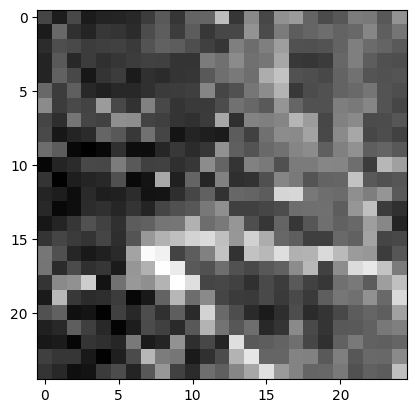

In [ ]:
img_gray_small = cv2.resize(img_gray,(25,25))
plt.imshow(img_gray_small, cmap='gray')

In [ ]:
print(img_gray_small.shape)

(25, 25)


#### Inspecting the color images

In [ ]:
img = cv2.imread(root + "/bike/bike_023.bmp")

In [ ]:
img = img[50:250,40:240,:]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(200, 200, 3)


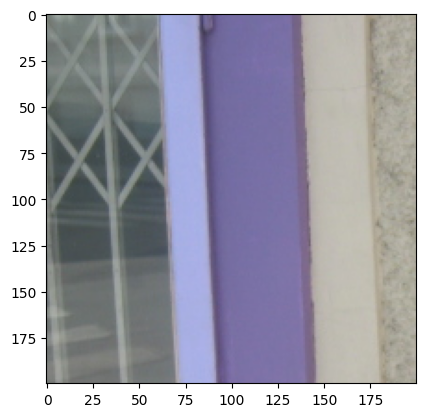

In [ ]:
plt.imshow(img)
print(img.shape)

In [ ]:
crop = img[150:155,0:5,:]

In [ ]:
print(crop)

[[[117 118 120]
  [137 138 140]
  [152 157 151]
  [151 156 149]
  [147 153 141]]

 [[114 118 119]
  [134 138 139]
  [152 157 153]
  [149 154 147]
  [147 153 143]]

 [[112 116 117]
  [128 132 133]
  [152 157 153]
  [150 155 148]
  [145 151 141]]

 [[110 115 118]
  [126 131 134]
  [151 155 154]
  [148 153 147]
  [147 153 143]]

 [[113 118 121]
  [121 126 129]
  [151 155 154]
  [151 156 150]
  [149 152 143]]]


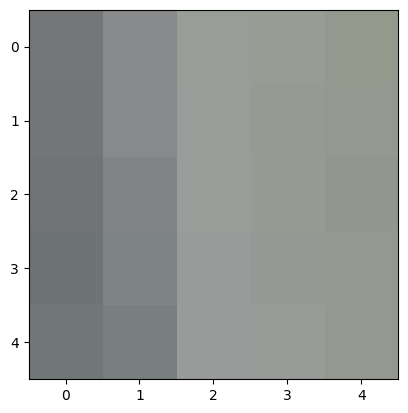

In [ ]:
plt.imshow(crop)

### Training a neural network

In [16]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision import datasets


In [17]:
data_folder = '~/data/FMNIST' # This can be any directory you want to
# download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.0MB/s]


Extracting /root/data/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 299kB/s]


Extracting /root/data/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.67MB/s]


Extracting /root/data/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]

Extracting /root/data/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



torch.float32
torch.int64
torch.Size([60000])
10
60000
torch.Size([60000, 28, 28])
torch.Size([28, 28])


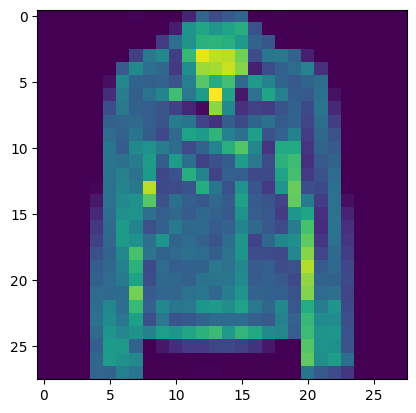

In [18]:
plt.imshow(tr_images[134])
print(tr_images[1].float().dtype)
print(tr_targets[1].dtype)
print(tr_targets.shape)
print(len(np.unique(tr_targets)))
print(len(tr_images))
print(tr_images.shape) # we have 60000 images with a shape of 28 by 28 - The channel is not indicated :(
print(tr_images[1].shape)

In [19]:
# here we extend the dataset class and define 3 functions __init__, __getitem__ & __len__
class FMNISTDataset(Dataset):
    def __init__(self, x, y): # x is the tensor with input images & y is the labels
        x = x.float()
        # We flatten each image
        x = x.view(-1,28*28) # reshape to batch size by 784, -1 is to automatically determine the batch size
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix] # Retrieve sample at the position
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

In [20]:
def get_data(): # this function generates a training data loader that loads 32 data points at a time
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

## QUESTION:  TRAINING THE NEURAL NETWORK

1. __Write a brief comment on the dataset class FMNISTDataset__ - It has 60, 000 images that are 28 by 28 in size which can be categorized into 10 categories.

2. __Why do we shuffle data in the Dataloader__ - We shuffle the training data in the dataloader so as to increase 'hypothetically' the size of the training dataset and avoid overfitting which occurs when the model sees the same type of data over and over again and thus improves generalization

3. __When we have batch size of 32, what is the shape of the input to the Neural network and
the shape of the output?__ - _32 by 784_ since the images are already flattened when we were loading the data

4. __How many parameters (weights & biases) does the given model have?__  I run the summary(model, (1, 784)) below and got: _795,010_ parameters

5. __What is a loss function? Why do we use cross-entropy loss, and what other losses are
there?__ - A loss function is used to measure how well the model's predictions match the true values; it quantifies this difference. Here we use cross-entropy loss because we are tackling a multi-class classification problem . Other types of loss functions include

    - Mean squared error
    - Mean absolute error
    - Huber loss
    - Triplet loss
6. __What is the role of the optimizer? Give a list of optimizers you could use in Deep learning__ - Optimizer is used to calculate and step the gradients, it propagates the errors back to the weights and biases, calculate their respective gradients and update the weights iteratively until a desired loss that can be tolerated is achieved.

    - Adam
    - SGD
    - AdamW
    - Nestrov Accelerated Gradient
    - Adagrad
    - RMSprop
7. __Why do we need the learning rate parameter?__ - We need the learning rate to accelerate/step the convergence of our weights (if carefully chosen), it determines how large or small the weights updates will be during training.

8.__Why do we do batching? What is the difference between mini-batch and multiple-batches__ - it speeds up training, as the model looks at the data multiple samples at a time which means we utilize computing resources wisely. Mini-Batch refers to the individual subset of the dataset used for one weight update. whereas multiple batches refers to the collection of mini-batches used to complete an entire pass (epoch) through the dataset.

9. __How often do we do gradient updates if our dataset has 60,000 data points and uses a batch size of 32? What about using a batch size of 1,000?__

   for batch size 32, the model will update its weights after every 32 samples, whereas for a batch size of 1,000 it will update after every 1000 samples.




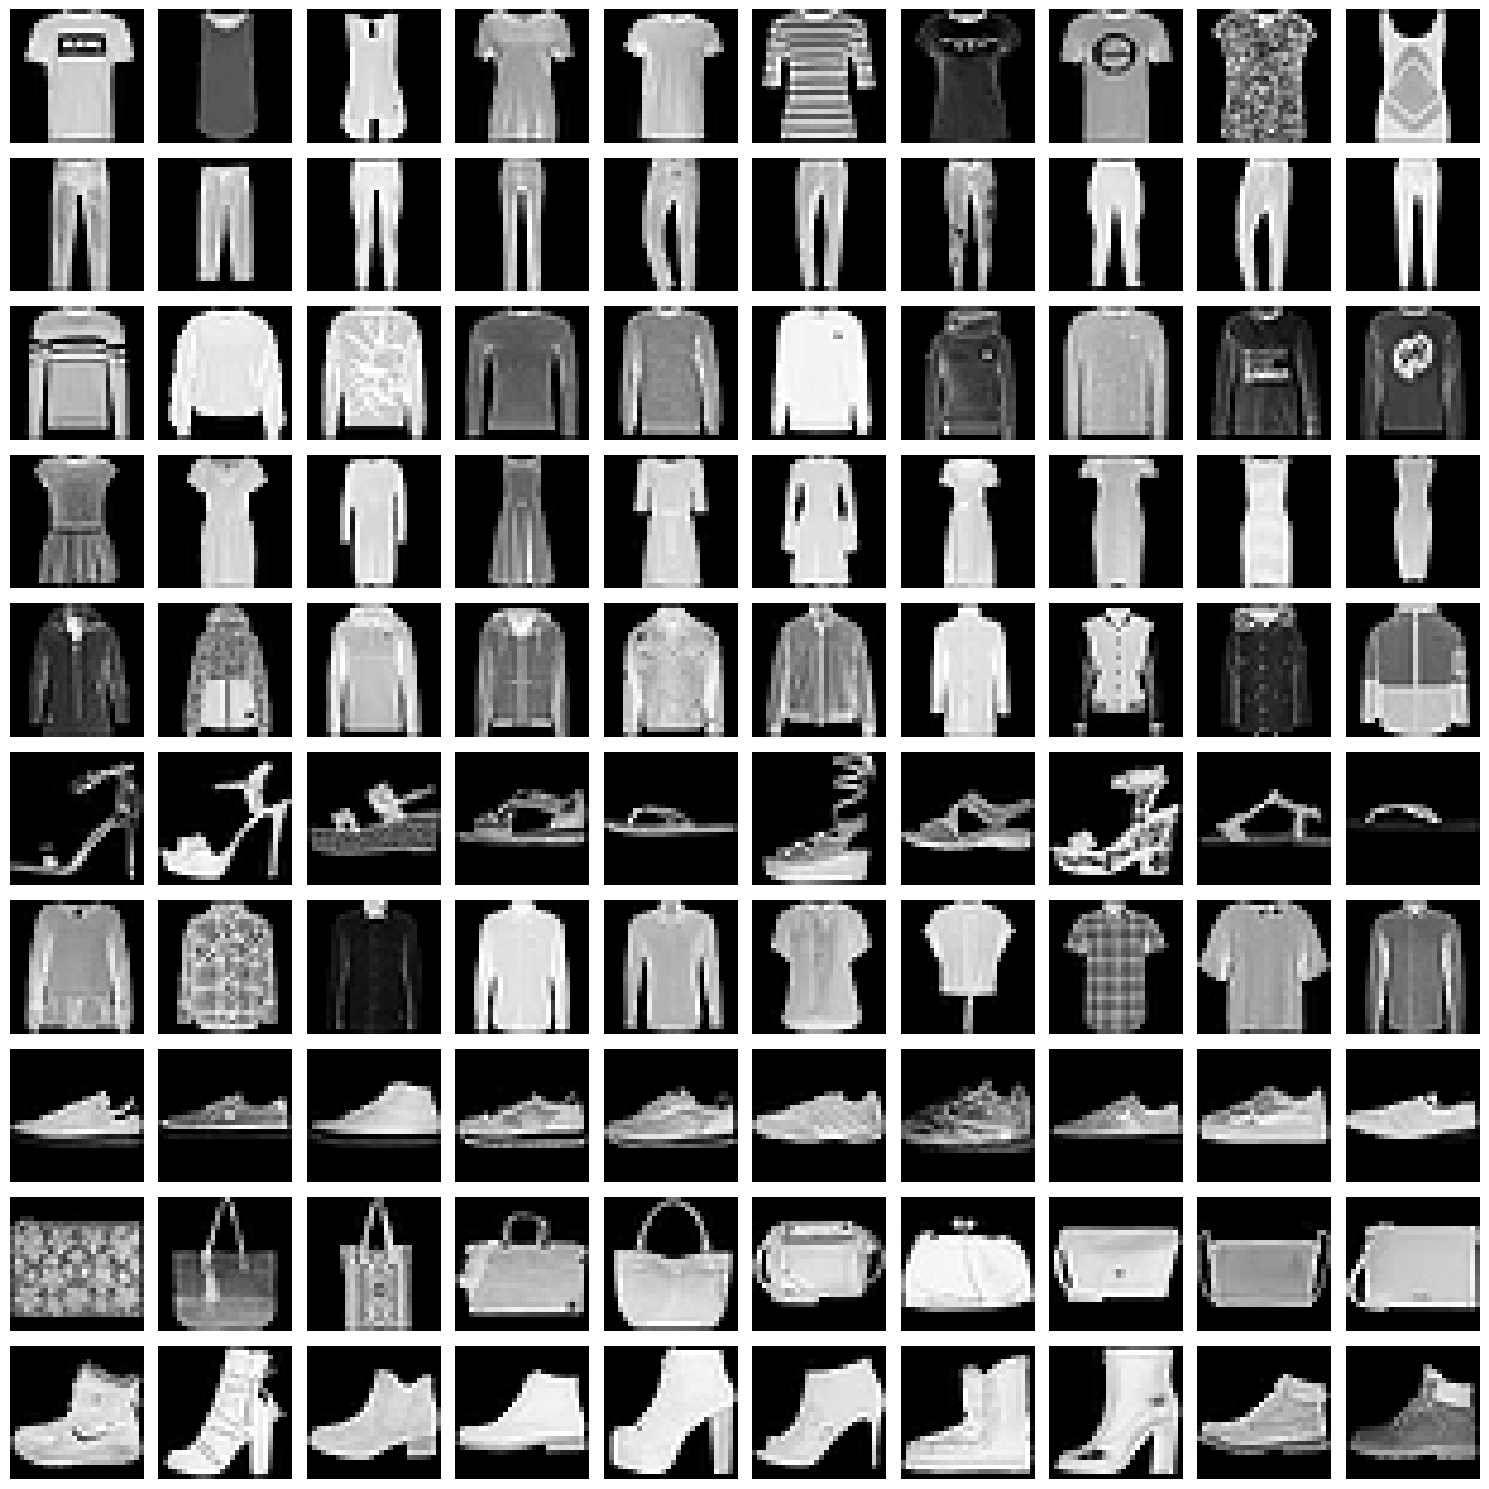

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(15, 15))

# Generates a dictionary of empty samples
samples = {i: [] for i in range(10)}
# print(samples)

for index in range(len(tr_targets)):
    target = tr_targets[index].item()
    if len(samples[target]) < 10:
        samples[target].append(tr_images[index])
    if all(len(v) == 10 for v in samples.values()):
        break
# print(samples)

for key in samples:
    samples[key] = torch.stack(samples[key])
for row in range(10):  # 10 classes
    for col in range(10):  # 10 samples per class
        image = samples[row][col].numpy()  # Convert tensor to NumPy for plotting
        axes[row, col].imshow(image, cmap="gray")
        axes[row, col].axis("off")  # Hide axis

plt.tight_layout()
plt.show()        

In [22]:
from torch.optim import SGD
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

model, _, _ = get_model()
summary(model, (1, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1000]         785,000
              ReLU-2              [-1, 1, 1000]               0
            Linear-3                [-1, 1, 10]          10,010
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.03
Estimated Total Size (MB): 3.05
----------------------------------------------------------------


In [23]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()  # call your model like any python function on your batch of inputs
    prediction = model(x)
    # compute loss
    batch_loss = loss_fn(prediction, y)
    # based on the forward pass in `model(x)` compute all the gradients of
    # 'model.parameters()'
    batch_loss.backward()
    # apply new-weights = f(old-weights, old-weight-gradients) where
    # "f" is the optimizer
    optimizer.step()
    # Flush gradients memory for next batch of calculations
    optimizer.zero_grad()
    return batch_loss.item()

In [24]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval() # <- let's wait till we get to dropout section
    # get the prediction matrix for a tensor of `x` images
    prediction = model(x)
    # compute if the location of maximum in each row coincides
    # with ground truth
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [25]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

In [26]:
losses, accuracies = [], []
for epoch in range(5): # In one epoch the model sees all training data once.
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):# Mini-Batch Training: The function processes an entire batch (e.g., 32 instances) at a time, not one instance at a time.
    # Iterations per epoch = Dataset size / Batch size.
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)


# Mini-Batch Training: The function processes an entire batch (e.g., 32 instances) at a time, not one instance at a time.
# the 32 images are processed simultaneously
# The batch size controls how many data points are processed per forward pass
# One epoch = The model sees all training data once.
# More epochs means more times the model sees the data (better learning, but risk of overfitting).

0
1
2
3
4


<ipython-input-27-7c73659c62d9>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


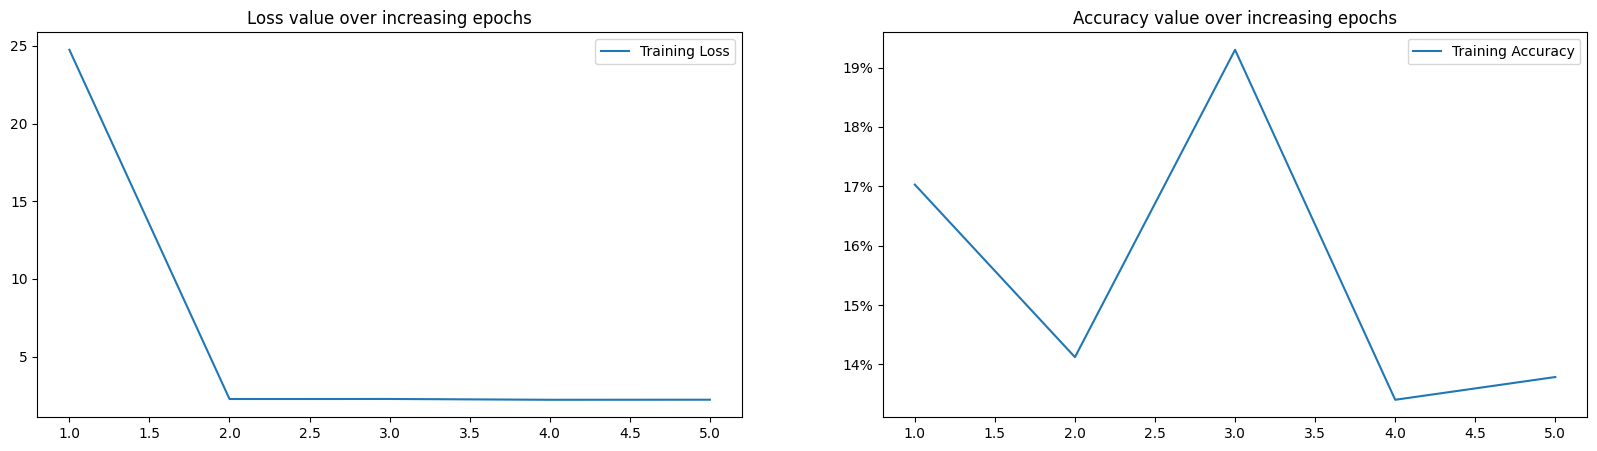

In [27]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()

In [28]:
from torch.utils.data import DataLoader, TensorDataset
import torch

# Create dummy data (100 samples, each with 3 features)
x = torch.randn(100, 3)
y = torch.randint(0, 2, (100,))  # Binary labels (0 or 1)

# Create a dataset
dataset = TensorDataset(x, y)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Fetch a single batch
x_batch, y_batch = next(iter(dataloader))
print(x_batch.shape, y_batch.shape)  # Output: torch.Size([10, 3]) torch.Size([10])


torch.Size([10, 3]) torch.Size([10])


In [29]:
print(dataloader)

In [30]:
print(x_batch)

tensor([[ 1.1106, -0.0828, -1.5022],
        [-0.4708,  0.4174, -0.7569],
        [-0.6465, -0.5765,  0.4334],
        [-2.3631, -0.7147, -1.2766],
        [ 2.5989,  0.9068, -0.6869],
        [ 0.5626,  0.4424, -1.1971],
        [-1.1610,  0.2044, -0.7582],
        [-0.0262, -0.6394, -0.3312],
        [-0.9794,  1.1899,  0.1641],
        [ 1.9525, -0.6653,  0.9111]])


### Scaling the dataset

## QUESTION: SCALING

Your dataset is initially made of tensors with numbers between 0 -255; you can scale them (as is
done in the notebook) by dividing by 255 so that it's between 0 and 1.
- __What is the difference in the results you see?__
       - The scaled values training accuracy improve quickly in fewer epochs compared to unscaled values, its loss also continously decreases unlike the raw pixels which plateaus after some point
- __Can you explain why we see that difference?__
      - One could be the fact that smaller values of pixels generate smaller gradients hence easy to optimize them. Large weights make the updating and covergence slow because they are large even the effect of learning rate on them will be minimal hence the training will be unstable.

In [31]:
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"
import numpy as np
data_folder = '~/data/FMNIST' # This can be any directory you want
# to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [32]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255 # here we rescale all the values to 0 to 1
        x = x.view(-1,28*28)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)


In [33]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl
from torch.optim import SGD
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    # call your model like any python function on your batch of inputs
    prediction = model(x)
    # compute loss
    batch_loss = loss_fn(prediction, y)
    # based on the forward pass in `model(x)` compute all the gradients of
    # 'model.parameters()'
    batch_loss.backward()
    # apply new-weights = f(old-weights, old-weight-gradients)
    # where "f" is the optimizer
    optimizer.step()
    # Flush memory for next batch of calculations
    optimizer.zero_grad()
    return batch_loss.item()
def accuracy(x, y, model):
    model.eval()
    # since there's no need for updating weights, we might
    # as well not compute the gradients
    with torch.no_grad():
        # get the prediction matrix for a tensor of `x` images
        prediction = model(x)
    # compute if the location of maximum in each row coincides
    # with ground truth
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()
trn_dl = get_data()
model, loss_fn, optimizer = get_model()
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


<ipython-input-34-8c79e0cf7159>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


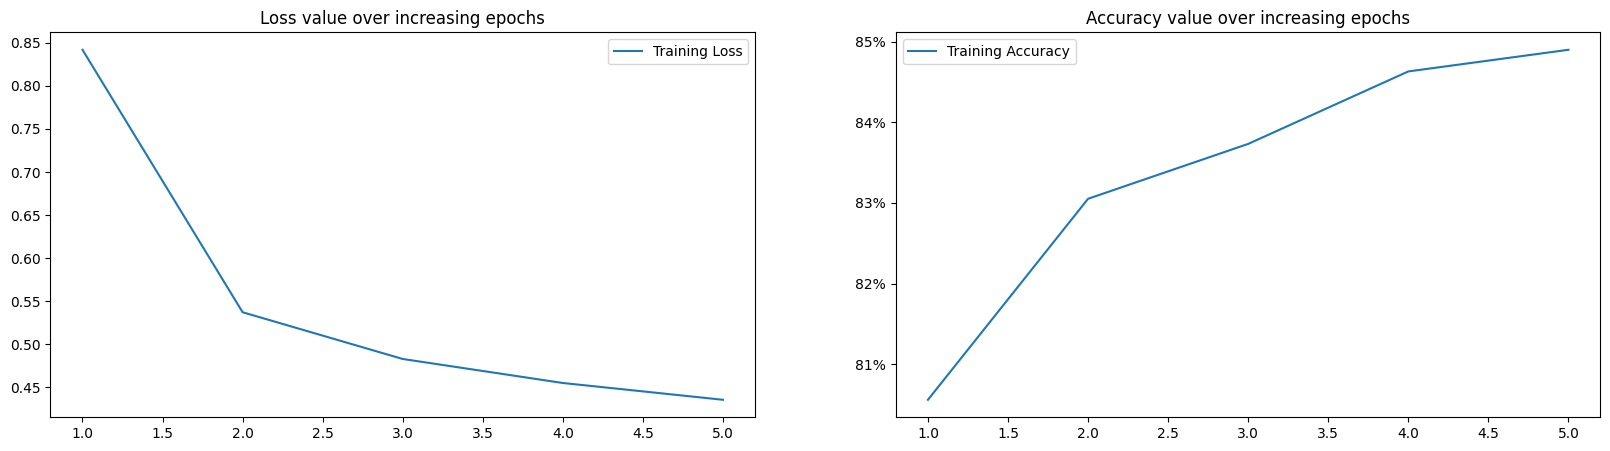

In [34]:
epochs = np.arange(5)+1
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()

### Varying the batch size

#### Batch size of 32

In [35]:
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST' # This can be any directory you want to
# download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [36]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [38]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    model.eval()
    # this is the same as @torch.no_grad
    # at the top of function, only difference
    # being, grad is not computed in the with scope
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [39]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

In [40]:
@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [41]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [42]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


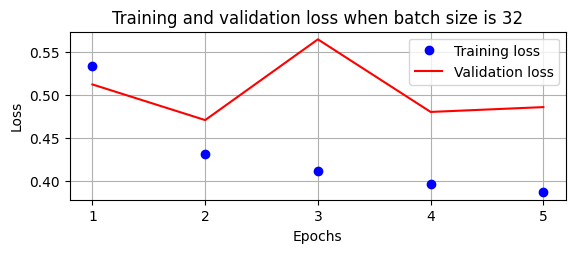

<ipython-input-43-b33e335f863e>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


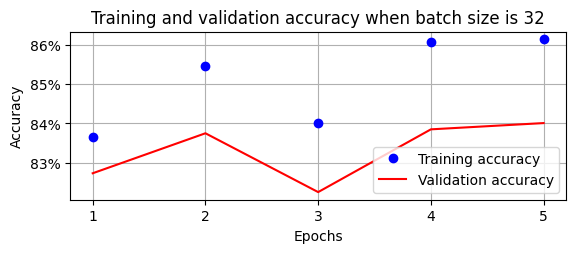

In [43]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

#### Batch size of 10,000

In [44]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=10000, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl


In [45]:

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [46]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


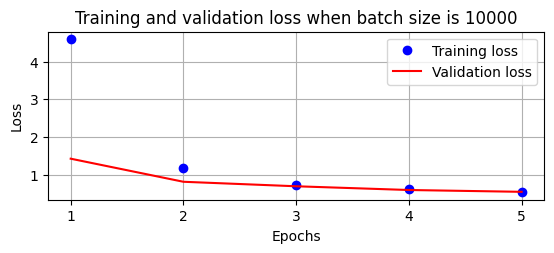

<ipython-input-47-68c2d9f6f26f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


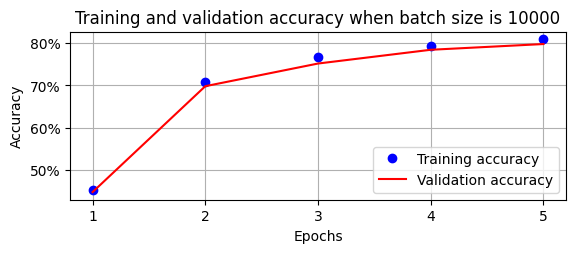

In [47]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 10000')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy when batch size is 10000')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

## QUESTION: DIFFERENT BATCH SIZE

### Batch size 32

From the plotted graph above, a batch size of 32 has an accuracy of 85% as the fifth epoch, while there is some gap between the training accuracy and validation accuracy where the training accuracy is still higher than the validation accuracy

### Batch size of 1000

From the plotted graphs above, a batch size of 1000 has an accuracy of 80% as of the fitfh epoch while the training accuracy and validation accuracy is close to each other

### Explanation

A batch size of 32 has a higher accuracy than a batch size of 1000, because weights are updated more frequently than a batch size of 1000 per epoch, this means that weights have enough time to update and converge to the optimal solutions. This though might lead to overfitting as shown in the graph where the training accuracy keeps improving whereas the validation accuracy is always lower than the training accuracy. This means that our model keeps getting better/ fitting better into training data but not improving well in unseen data. Poor generalization.

The inference from the losses graph is that the loss graph for a batch size of 32 maybe be aggresive and high in the first few epochs because we are rapidly updating weights whereeas in a batch size of 1000 it is smoother because we do not update the weights more rapidly as is the case on batch size of 32

### Varying the Optimizer

#### Stochastic Gradient Descent

In [48]:
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST' # This can be any directory you want to
# download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [49]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    model.eval()
    # this is the same as @torch.no_grad
    # at the top of function, only difference
    # being, grad is not computed in the with scope
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [50]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


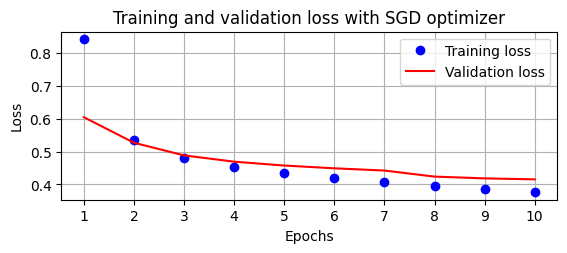

<ipython-input-51-7f41ec6d4ed6>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


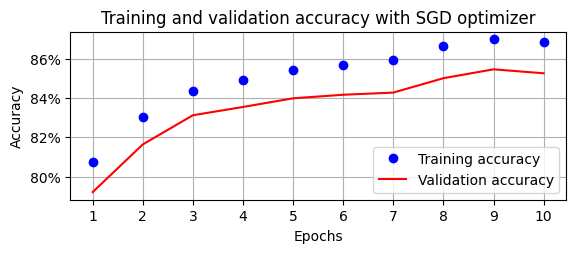

In [51]:
epochs = np.arange(10)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with SGD optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with SGD optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

#### Adam optimizer

In [52]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [53]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


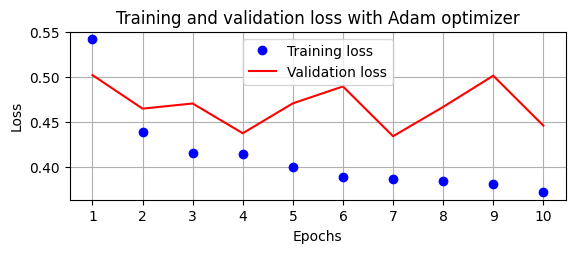

<ipython-input-54-69c5a65932a1>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


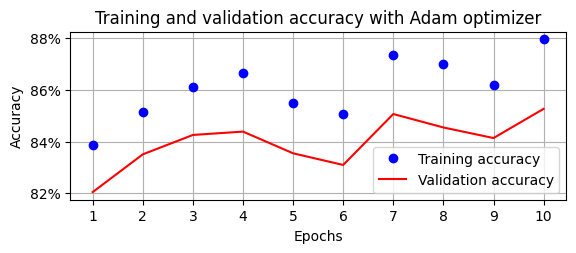

In [54]:
epochs = np.arange(10)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

## QUESTION: OPTIMIZERS

From the optimizers you listed above. Describe 3 of them; how do they work? How do
you expect them to affect your model's performance in training? Try those optimizers &
show the results, and explain them

__Nestrov Accelerated Gradient__
    - Nesterov Accelerated Gradient (NAG) improves momentum by looking ahead at the predicted next step before computing the gradient, leading to faster convergence and smoother updates. It helps avoid overshooting and accelerates training.

__Adagrad__
    - **Adagrad** adjusts the learning rate for each parameter based on its past gradients, using larger updates for infrequent features and smaller ones for frequent features. It helps with sparse data but can slow down over time as the learning rate decreases.
    
__RMSprop__
    -  RMSprop (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm that modifies Adagrad to reduce its drastically decreasing learning rate. It scales the learning rate based on a moving average of squared gradients, helping stabilize training.



### Applying NAG

0
1
2
3
4
5
6
7
8
9


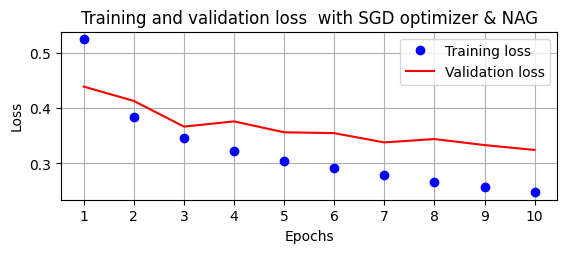

<ipython-input-96-ef0dff3ad764>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


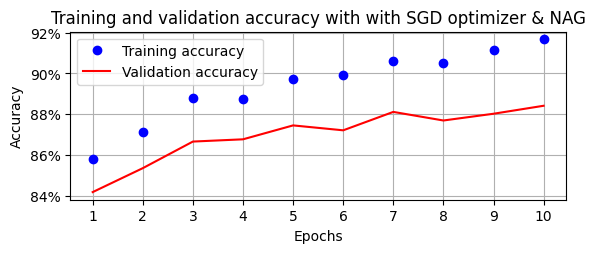

In [96]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

from torch.optim import SGD, Adam

def test_optimizer(optimizer_fn, title):
    def get_model():
        model = nn.Sequential(
            nn.Linear(28 * 28, 1000),
            nn.ReLU(),
            nn.Linear(1000, 10)
        ).to(device)
    
        loss_fn = nn.CrossEntropyLoss()
        optimizer = optimizer_fn(model.parameters())  
        return model, loss_fn, optimizer
    
    def train_batch(x, y, model, opt, loss_fn):
        model.train()
        prediction = model(x)
        batch_loss = loss_fn(prediction, y)
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return batch_loss.item()
    
    def accuracy(x, y, model):
        model.eval()
        # this is the same as @torch.no_grad
        # at the top of function, only difference
        # being, grad is not computed in the with scope
        with torch.no_grad():
            prediction = model(x)
        max_values, argmaxes = prediction.max(-1)
        is_correct = argmaxes == y
        return is_correct.cpu().numpy().tolist()
    
    def get_data():
        train = FMNISTDataset(tr_images, tr_targets)
        trn_dl = DataLoader(train, batch_size=32, shuffle=True)
        val = FMNISTDataset(val_images, val_targets)
        val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
        return trn_dl, val_dl
    
    @torch.no_grad()
    def val_loss(x, y, model):
        prediction = model(x)
        val_loss = loss_fn(prediction, y)
        return val_loss.item()
    
    trn_dl, val_dl = get_data()
    model, loss_fn, optimizer = get_model()
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []
    for epoch in range(10):
        print(epoch)
        train_epoch_losses, train_epoch_accuracies = [], []
        for ix, batch in enumerate(iter(trn_dl)):
            x, y = batch
            batch_loss = train_batch(x, y, model, optimizer, loss_fn)
            train_epoch_losses.append(batch_loss)
        train_epoch_loss = np.array(train_epoch_losses).mean()
    
        for ix, batch in enumerate(iter(trn_dl)):
            x, y = batch
            is_correct = accuracy(x, y, model)
            train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
        for ix, batch in enumerate(iter(val_dl)):
            x, y = batch
            val_is_correct = accuracy(x, y, model)
            validation_loss = val_loss(x, y, model)
        val_epoch_accuracy = np.mean(val_is_correct)
        train_losses.append(train_epoch_loss)
        train_accuracies.append(train_epoch_accuracy)
        val_losses.append(validation_loss)
        val_accuracies.append(val_epoch_accuracy)
    
    epochs = np.arange(10)+1
    import matplotlib.ticker as mtick
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
    %matplotlib inline
    plt.subplot(211)
    plt.plot(epochs, train_losses, 'bo', label='Training loss')
    plt.plot(epochs, val_losses, 'r', label='Validation loss')
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title(f'Training and validation loss  {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid('off')
    plt.show()
    plt.subplot(212)
    plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title(f'Training and validation accuracy with {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    plt.legend()
    plt.grid('off')
    plt.show()
optimizer_fn = lambda params: SGD(params, lr=1e-2, momentum=0.9, nesterov=True)
test_optimizer(optimizer_fn, "with SGD optimizer & NAG")

### Adagrad


0
1
2
3
4
5
6
7
8
9


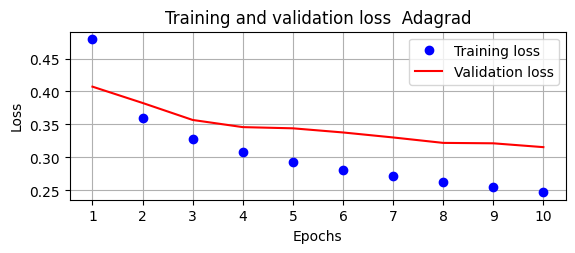

<ipython-input-96-ef0dff3ad764>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


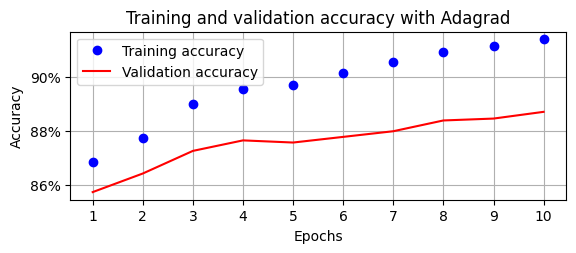

In [97]:
from torch.optim import Adagrad

test_optimizer(lambda params: Adagrad(params, lr=1e-2), "Adagrad")

### RMSProp

0
1
2
3
4
5
6
7
8
9


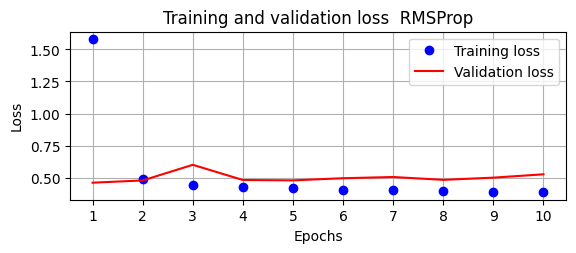

<ipython-input-96-ef0dff3ad764>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


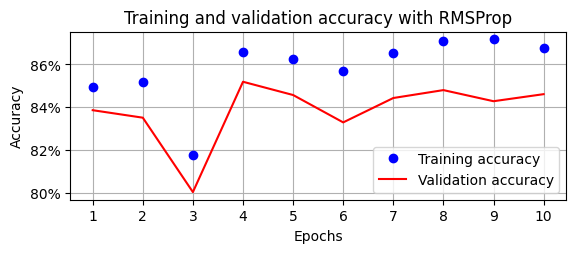

In [98]:
from torch.optim import RMSprop

test_optimizer(lambda params: RMSprop(params, lr=1e-2, alpha=0.99), "RMSProp")


### Building a deeper neural network

In [58]:
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST' # This can be any directory you want to
# download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [59]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#### Model with 0 hidden layers

In [61]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1,28*28)/255
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    model.eval()
    # this is the same as @torch.no_grad
    # at the top of function, only difference
    # being, grad is not computed in the with scope
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [62]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [63]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


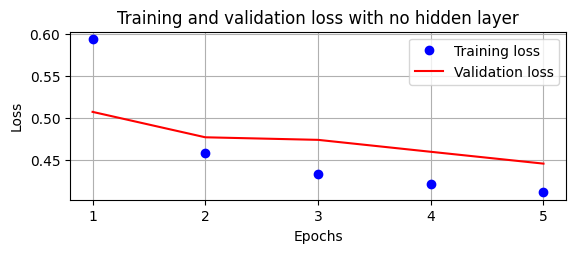

<ipython-input-64-03b820adafac>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


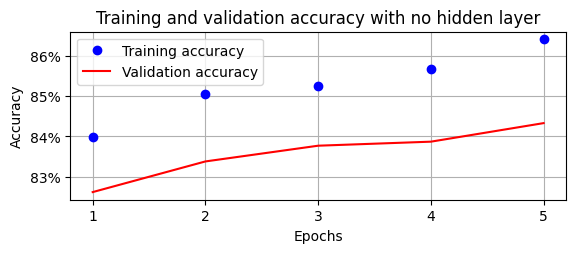

In [64]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()


#### Model with 1 hidden layer

In [65]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [66]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [67]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


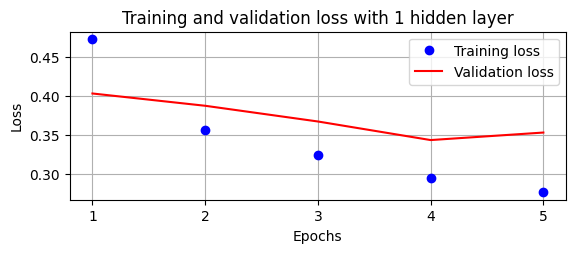

<ipython-input-68-3815951bb128>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


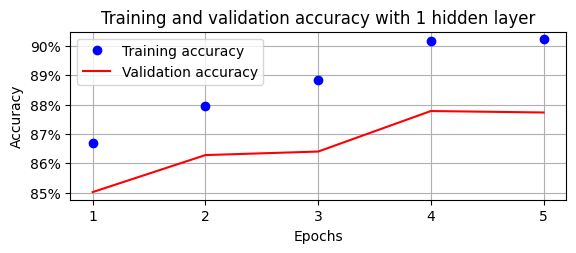

In [68]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 1 hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 1 hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

#### Model with 2 hidden layers

In [69]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [70]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [71]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


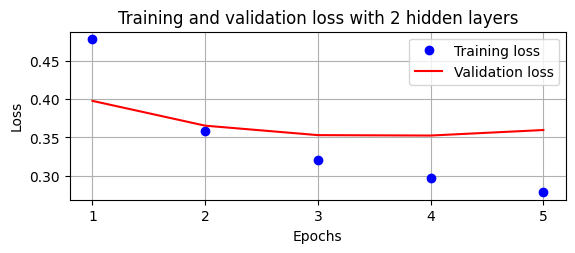

<ipython-input-72-b9e19784089d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


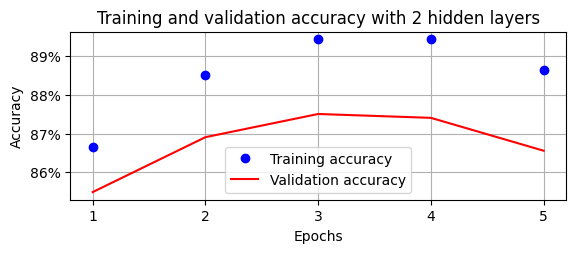

In [72]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 2 hidden layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 2 hidden layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

### Model with 3 hidden layers

In [73]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 1000),
        nn.ReLU(),
        nn.Linear(1000, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

0
1
2
3
4


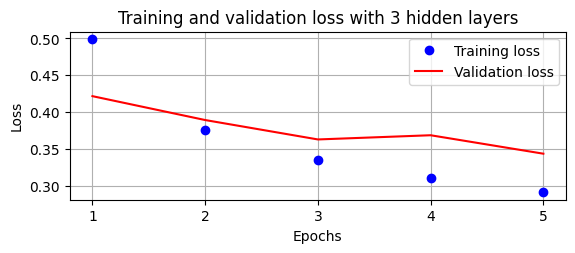

<ipython-input-74-3a0b6fcc3bdf>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


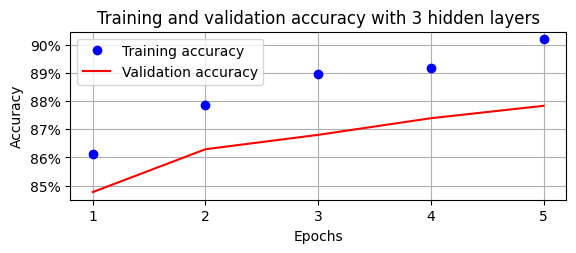

In [74]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)


epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 3 hidden layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 3 hidden layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

## QUESTION: MODEL DEPTH & SIZE

__Explore models of different depths that change the number of layers and the number of
hidden layers. Run at least four different architectures. What is the impact on the training time and performance of the model?__

- I tested models with 0 to 3 hidden layers and found that adding layers improved performance but increased training time. With 1 layer, training was fast but accuracy was limited, while 3 hidden layers delivered the best results at the cost of longer training and a higher risk of overfitting. Balancing depth and complexity is key to optimizing performance.

### Batch Normalization

In [75]:
# https://github.com/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter03/Batch_normalization.ipynb

## QUESTION: BATCH NORMALIZATION

1. What is batch normalization

    - Batch Normalization (BatchNorm) normalizes layer inputs in mini-batches during training by subtracting the batch mean and dividing by the batch variance, then scaling and shifting with learnable parameters. It speeds up training, improves stability, and acts as a regularizer, but performance can degrade with very small batch sizes.

3. Using this tutorial
(https://github.com/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master
/Chapter03/Batch_normalization.ipynb), explore the impact of batch normalization on
your training, plot and explain the histograms of the weight values at different layers of
your model.

### Setting up for Batch Normalization

In [76]:
from torchvision import datasets
import torch
data_folder = '/content/' # This can be any directory you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.1MB/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 305kB/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.52MB/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.87MB/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



### Without Batch Normalization

In [77]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/(255*10000)
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]        
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

from torch.optim import SGD, Adam
def get_model():
    class neuralnet(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_to_hidden_layer = nn.Linear(784,1000)
            self.hidden_layer_activation = nn.ReLU()
            self.hidden_to_output_layer = nn.Linear(1000,10)
        def forward(self, x):
            x = self.input_to_hidden_layer(x)
            x1 = self.hidden_layer_activation(x)
            x2= self.hidden_to_output_layer(x1)
            return x2, x1
    model = neuralnet().to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    prediction = model(x)[0]
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    with torch.no_grad():
        prediction = model(x)[0]
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [79]:
def get_data():     
    train = FMNISTDataset(tr_images, tr_targets)     
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)     
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=True)
    return trn_dl, val_dl

@torch.no_grad()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)[0]
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(100):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


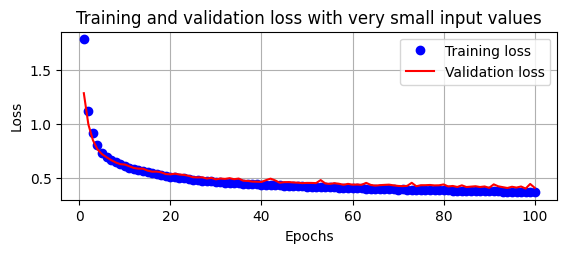

<ipython-input-81-c693318aa444>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


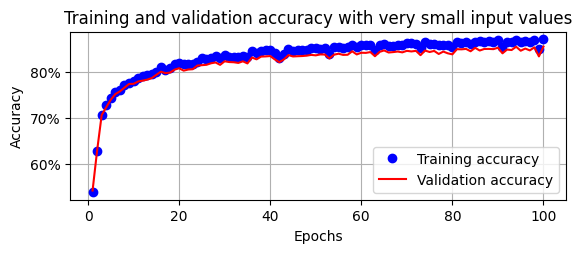

In [81]:
epochs = np.arange(100)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
#plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with very small input values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
#plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with very small input values')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.ylim(0.8,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

Text(0.5, 1.0, "Hidden layer node values' distribution")

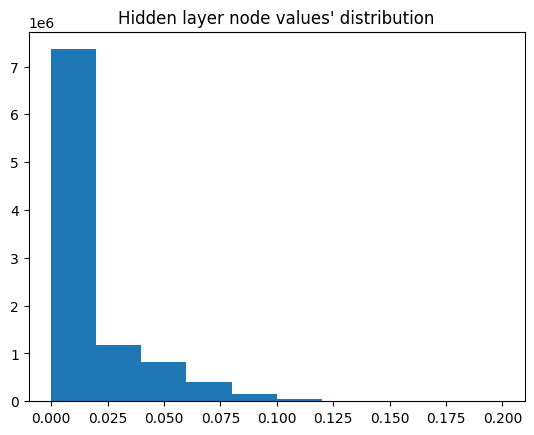

In [82]:
plt.hist(model(x)[1].cpu().detach().numpy().flatten())
plt.title("Hidden layer node values' distribution")

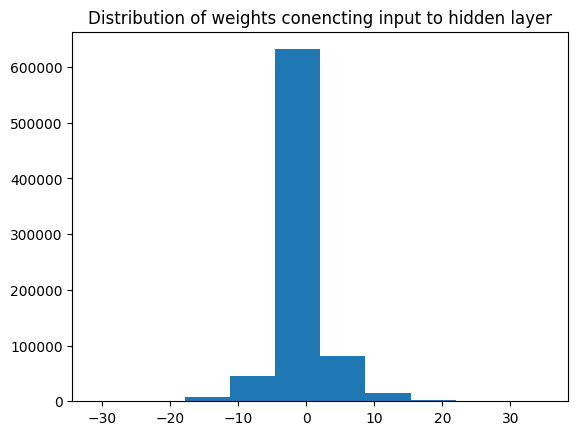

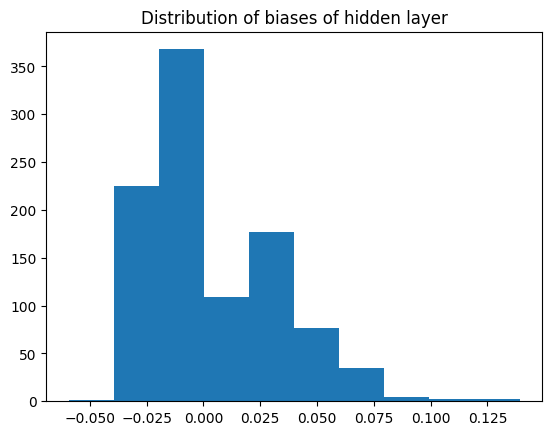

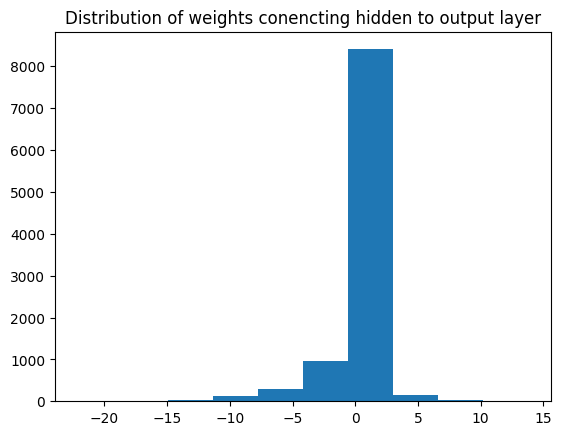

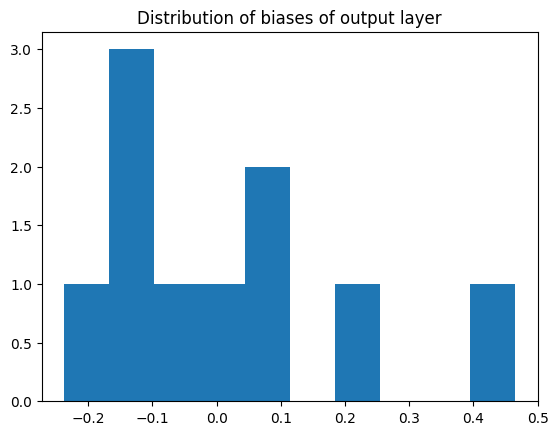

In [83]:
for ix, par in enumerate(model.parameters()):
  if(ix==0):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of weights conencting input to hidden layer')
      plt.show()
  elif(ix ==1):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of biases of hidden layer')
      plt.show()
  elif(ix==2):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of weights conencting hidden to output layer')
      plt.show()
  elif(ix ==3):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of biases of output layer')
      plt.show()

### With Batch Normalization

In [84]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/(255*10000)
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]        
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

from torch.optim import SGD, Adam
def get_model():
    class neuralnet(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_to_hidden_layer = nn.Linear(784,1000)
            self.batch_norm = nn.BatchNorm1d(1000)
            self.hidden_layer_activation = nn.ReLU()
            self.hidden_to_output_layer = nn.Linear(1000,10)
        def forward(self, x):
            x = self.input_to_hidden_layer(x)
            x0 = self.batch_norm(x)
            x1 = self.hidden_layer_activation(x0)
            x2= self.hidden_to_output_layer(x1)
            return x2, x1
    model = neuralnet().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    prediction = model(x)[0]
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    with torch.no_grad():
        prediction = model(x)[0]
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [85]:
def val_loss(x, y, model):
    model.eval()
    with torch.no_grad():
        prediction = model(x)[0]
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [86]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [88]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(100):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


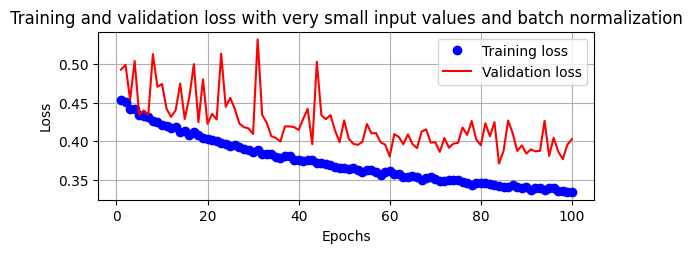

<ipython-input-89-2380b3436758>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


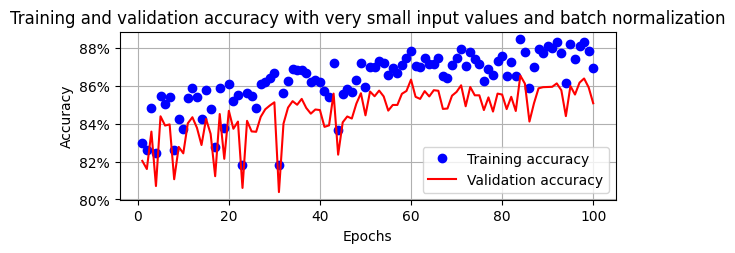

In [89]:
epochs = np.arange(100)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
#plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with very small input values and batch normalization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
#plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with very small input values and batch normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.ylim(0.8,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

Text(0.5, 1.0, "Hidden layer node values' distribution with batch normalization")

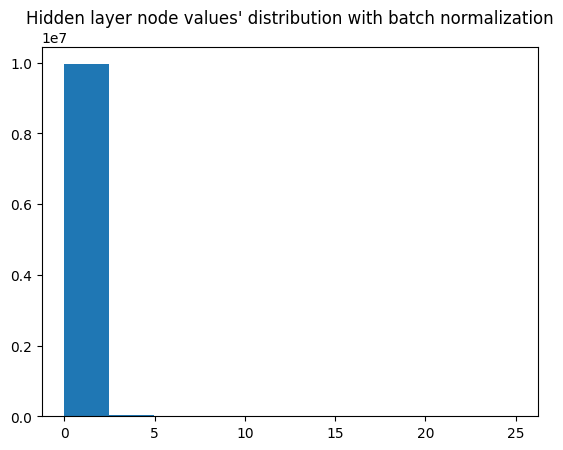

In [90]:
plt.hist(model(x)[1].cpu().detach().numpy().flatten())
plt.title("Hidden layer node values' distribution with batch normalization")

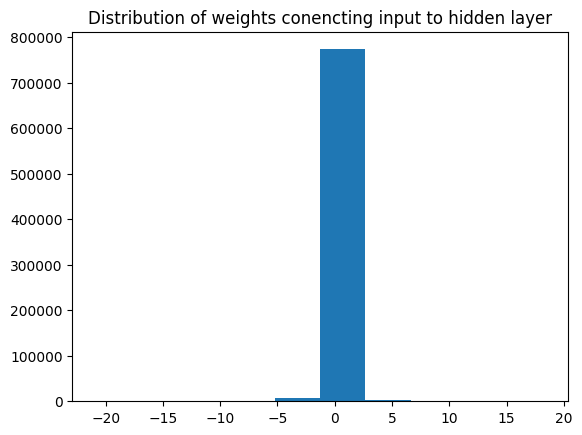

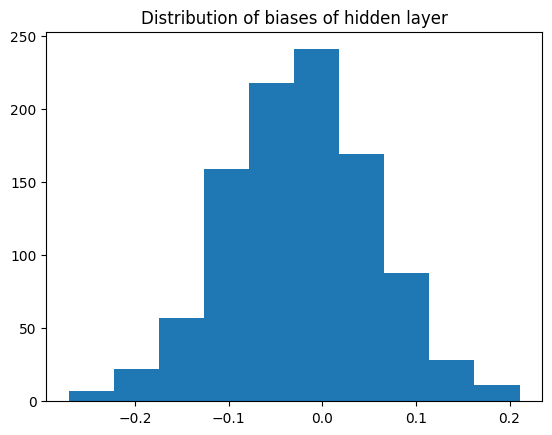

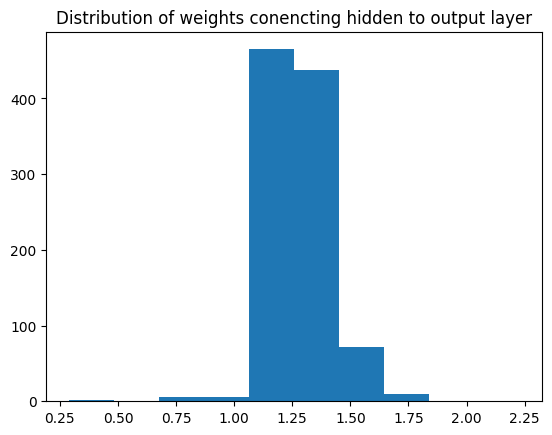

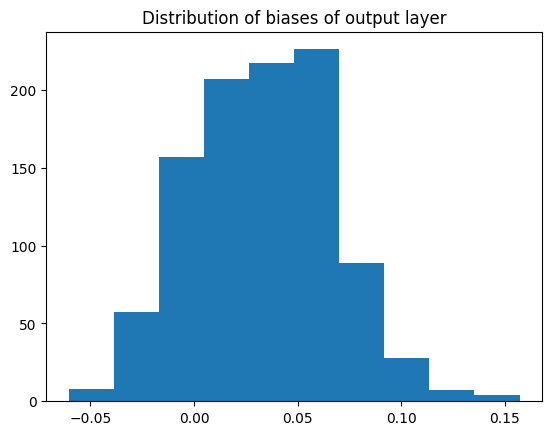

In [91]:
for ix, par in enumerate(model.parameters()):
  if(ix==0):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of weights conencting input to hidden layer')
      plt.show()
  elif(ix ==1):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of biases of hidden layer')
      plt.show()
  elif(ix==2):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of weights conencting hidden to output layer')
      plt.show()
  elif(ix ==3):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of biases of output layer')
      plt.show()  